In [2]:

import numpy as np
import scipy
import pandas as pd

In [3]:
mdata= pd.read_csv('train_imperson_without4n7_balanced_data.csv')

In [16]:
mdata.head()

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0,0,0,0,0,0,0,0.0,0


In [17]:

#investigating presence of missing data

mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB


In [20]:
#data is complete

m1= mdata.dropna()
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 114.0 MB


In [22]:
#investigating presence of duplicate values
#is this because Dr Yoo rebalanced the classes with some form of bootstrapping? Hence we leave them in?
#I think we should assume data are iid anyway, hence keep duplicates
#if later we can see that the model does nt generalize well we can go back and eliminate them.


m2 = mdata.drop_duplicates()
m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96497 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.4 MB


In [26]:
#duplicate rows for reference

mdata[mdata.duplicated() == True]

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
307,0,0,0,0.000017,0.000017,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
772,0,0,0,0.000011,0.000011,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
1565,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
7708,0,0,0,0.000037,0.000037,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
13105,0,0,0,0.000011,0.000011,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
14832,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
14924,0,0,0,0.000011,0.000011,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
14935,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
14958,0,0,0,0.000017,0.000017,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0
14987,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0,0,0,0,0,0,0,0.000000,0


In [27]:
mdata.describe()

,1,2,3,5,6,8,9,10,11,12,...,146,147,148,149,150,151,152,153,154,155
count,97044.0,97044.0,97044.0,97044.000000,97044.000000,97044.000000,97044.000000,97044.0,97044.0,97044.0,...,97044.000000,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.0,97044.000000,97044.000000
mean,0.0,0.0,0.0,0.006252,0.006252,0.193837,0.193837,0.0,0.0,0.0,...,0.028436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178474,0.500000
std,0.0,0.0,0.0,0.015541,0.015541,0.354444,0.354444,0.0,0.0,0.0,...,0.062765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360078,0.500003
min,0.0,0.0,0.0,0.000003,0.000003,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.001442,0.001442,0.037908,0.037908,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.003706,0.003706,0.037908,0.037908,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023873,0.500000
75%,0.0,0.0,0.0,0.005916,0.005916,0.054902,0.054902,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023873,1.000000
max,0.0,0.0,0.0,0.978440,0.978440,1.000000,1.000000,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


In [4]:
#separate X and Y

X, Y = mdata.loc[:, mdata.columns != '155'], mdata['155']

In [34]:
X.head()

,1,2,3,5,6,8,9,10,11,12,...,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [44]:
X.std().value_counts()

0.000000    74
0.014709    11
0.354444     2
0.003210     2
0.062765     2
0.015541     2
0.036295     1
0.008669     1
0.395372     1
0.286272     1
0.260131     1
0.009079     1
0.263952     1
0.000002     1
0.271498     1
0.002383     1
0.373863     1
0.013305     1
0.000414     1
0.005749     1
0.279912     1
0.001966     1
0.000030     1
0.145165     1
0.058399     1
0.001220     1
0.457477     1
0.457572     1
0.017849     1
0.000002     1
            ..
0.281597     1
0.116929     1
0.025487     1
0.000311     1
0.015720     1
0.220310     1
0.000998     1
0.032084     1
0.011518     1
0.456470     1
0.060476     1
0.109809     1
0.017885     1
0.126024     1
0.360078     1
0.262489     1
0.473930     1
0.001139     1
0.004540     1
0.450047     1
0.014432     1
0.021289     1
0.074530     1
0.021005     1
0.165173     1
0.002451     1
0.024858     1
0.010997     1
0.032883     1
0.224398     1
Length: 65, dtype: int64

In [5]:
#eliminate features with 0 standard deviation

X1_sigma = X.loc[:, (X.std()>0)]

In [42]:
X1_sigma.head()

,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X1_sigma.skew()

5       17.200153
6       17.200153
8        1.772145
9        1.772145
14     -67.957971
15     -67.957971
16     -67.957971
18     -67.957971
20     -67.957971
26     -67.957971
29     -67.957971
38      -0.977053
43     -67.957971
47       1.168598
48     -67.934197
50      -0.881052
51       0.882182
52     -67.957971
61      -2.572446
62     -67.957971
64      -1.357737
66      -1.310025
67       0.308908
68      -0.797523
70       3.217715
71       0.672478
72      31.104195
73      -0.894060
75      35.206595
76      34.939381
          ...    
107      8.981833
108      3.111769
109     19.766029
110      3.649254
111     46.932015
112     16.107402
113    179.849937
117    148.691166
118      2.864029
119     49.177087
120      3.109743
121     14.550269
122      5.998186
123     40.180226
125     25.930336
126      6.592108
127      6.600506
128      6.717656
129      6.592108
130      6.592108
133    311.518860
138    311.518860
140      0.535234
141     10.375253
142      0

In [53]:
np.median(X1_sigma.skew())

4.84847723941932

In [52]:
X1_sigma['14'].describe()

count    97044.000000
mean         0.999784
std          0.014709
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: 14, dtype: float64

In [53]:
X1_sigma['14'].value_counts()

1    97023
0       21
Name: 14, dtype: int64

In [54]:
X1_sigma['133'].describe()

count    97044.00000
mean         0.00001
std          0.00321
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: 133, dtype: float64

In [55]:
X1_sigma['133'].value_counts()

0    97043
1        1
Name: 133, dtype: int64

In [7]:
X1_sigma['138'].value_counts()

0.50    97043
0.88        1
Name: 138, dtype: int64

In [9]:
#example of square root transform

xsqrt = np.sqrt(X1_sigma['5'])

In [10]:
xsqrt.skew()

3.7898261887995903

In [21]:
X2 = X1_sigma.loc[:, X1_sigma.columns != '133']

In [23]:
X2 = X2.loc[:, X2.columns != '138']

In [24]:
X2.shape

(97044, 76)

In [26]:
import matplotlib as plt
%matplotlib inline

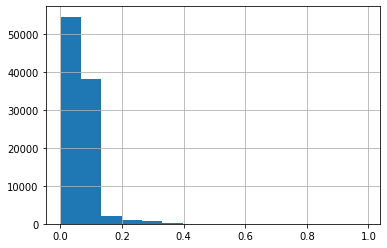

In [35]:
#histogran after the sqrt transformation

np.sqrt(X1_sigma['5']).hist(bins = 15)

In [33]:
X1_sigma['14'].value_counts()

1    97023
0       21
Name: 14, dtype: int64

In [38]:
#Normalizer transform

from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X2)
normalizedX2 = scaler.transform(X2)

In [40]:
#Power and quantile transform. THe latter distorts correlation, hence try the former

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson').fit(X2)
poweredX2 = pt.transform(X2)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [46]:
NX2df = pd.DataFrame(normalizedX2, columns = X2.columns)

In [47]:
NX2df.skew()

5       23.853569
6       23.853569
8        1.767665
9        1.767665
14      -1.104792
15      -1.104792
16      -1.104792
18      -1.104792
20      -1.104792
26      -1.104792
29      -1.104792
38      -0.779509
43      -1.104792
47       1.116813
48      -1.104653
50      -0.866236
51       0.916131
52      -1.104792
61      -1.076492
62      -1.104792
64      -1.747538
66      -1.360498
67       0.490871
68      -0.776988
70       3.249814
71       0.672671
72      31.127732
73      -0.871388
75      34.583698
76      33.909286
          ...    
105    209.970798
106     33.958128
107      8.923867
108      3.115483
109     19.562285
110      3.654139
111     46.942551
112     15.848614
113    179.849940
117    148.966309
118      2.951593
119     48.902946
120      3.402142
121     14.553690
122      6.052883
123     40.192654
125     25.944878
126      6.594483
127      6.600694
128      6.717973
129      6.594483
130      6.594483
140      0.413867
141     10.299344
142      0

In [51]:
np.median(NX2df.skew())

3.819768845905126

In [48]:
PX2df = pd.DataFrame(poweredX2, columns = X2.columns)

In [49]:
PX2df.skew()

5        0.635083
6        0.635083
8        1.259153
9        1.259153
14     -67.957971
15     -67.957971
16     -67.957971
18     -67.957971
20     -67.957971
26     -67.957971
29     -67.957971
38      -0.028114
43     -67.957971
47       0.870651
48      17.065669
50      -0.881052
51       0.882182
52     -67.957971
61       0.418366
62     -67.957971
64      -0.215201
66      -0.981152
67       0.120504
68      -0.726600
70       3.217715
71       0.672478
72      31.104195
73      -0.894060
75       1.147929
76       1.567493
          ...    
105    179.849937
106     33.945872
107      5.290120
108      3.111769
109     15.929278
110      3.637986
111     46.932015
112     13.511611
113    179.849937
117    110.126632
118      2.864029
119      3.140320
120      3.081872
121     14.550269
122      4.965352
123     40.180226
125     25.462199
126      6.592108
127      6.592108
128      6.592108
129      6.592108
130      6.592108
140      0.085339
141      9.342772
142      0

In [52]:
np.median(PX2df.skew())

2.3079008562602805